In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Domain Analysis

- understanding the meaning of features to check the impact on target variable



1. **empnumber** : A unique identifier for each employee. This is not relevant for analysis or prediction.


2. **Age** : The employee's age in years. Older employees might have more experience but could also face burnout.   

3. **gender** : The gender of the employee (e.g., Male, Female). This could highlight diversity in performance patterns.   

4. **education background** : The employee's field of education (e.g., Arts, Science, Engineering). Relevant for roles requiring specific technical skills.    

5. **marital status** : The marital status of the employee (e.g., Single, Married, Divorced). This may affect work-life balance and job performance.   

6. **empdepartment** : The department the employee works in (e.g., HR, Sales, IT). Crucial for analyzing department-wise performance trends.   

7. **empjobrole** : The specific job role within the department (e.g., Manager, Analyst). Directly related to performance expectations.    

8. **business travel frequency** : How often the employee travels for business (e.g., Rarely, Frequently). Frequent travel might lead to stress but could also indicate job importance.   

9. **distance from home** : The distance from the employee's residence to the workplace. Longer distances might affect punctuality and productivity.   

10. **empeducationlevel** : The employee's education level (scale of 1-5). Higher education levels could indicate better knowledge or skills.    

11. **empeducationsatisfaction** : Satisfaction with education (scale of 1-5). Dissatisfaction may reflect mismatched job expectations.    

12. **emphourlyrate** : The hourly pay rate for the employee. Lower pay rates might cause dissatisfaction and impact performance.   

13. **empjobinvolvement** : The level of involvement in the job (scale of 1-4). High involvement is positively correlated with performance.    

14. **empjoblevel** : The level of the job in the organizational hierarchy (e.g., Junior, Mid, Senior). Higher levels may indicate more responsibility and stress.    

15. **empjobsatisfaction** : Satisfaction with the job (scale of 1-5). High satisfaction is linked to better performance.   

16. **numcompaniesworked** : The number of companies the employee has previously worked at. Could reflect adaptability or instability in employment history.   

17. **overtime** : Whether the employee works overtime (Yes/No). Overtime might indicate dedication but could also lead to burnout.   

18. **emplastsalaryhikepercent** : The percentage of the last salary hike received. Low hikes may demotivate employees, affecting performance.    

19. **emprelationshipsatisfaction** : Satisfaction with workplace relationships (scale of 1-5). Poor relationships can hinder teamwork and performance.   

20. **totalworkexperienceyears** : Total years of work experience across all jobs. More experience often correlates with better performance.   

21. **trainingtimeslastyear** : The number of training sessions attended in the last year. More training could enhance skills and boost performance.   

22. **empworklifebalance** : Perceived work-life balance (scale of 1-4). Poor work-life balance may lead to stress and lower performance.   

23. **experienceyearsatthiscompany** : Total years of experience at the current company. Longer tenure could indicate loyalty but might also lead to stagnation.

24. **experience years in current role** : The number of years in the current job role. Relevant for understanding expertise in the role.   

25. **years since last promotion** : Time since the last promotion. Longer gaps may cause dissatisfaction and affect morale.   

26. **yearswithcurr manager** : The number of years under the current manager. Good rapport with a manager can enhance performance.   

27. **attrition** : Whether the employee has left the company (Yes/No). Useful for identifying patterns among employees who leave.   

28. **performance rating** : The overall performance rating given to the employee (scale of 1-5). This is the target variable for prediction.

In [3]:
#dropping unnecessary columns
df.drop('EmpNumber',axis =1,inplace = True)

# Basic Checks

In [4]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [5]:
print("Shape of the Dataset :", df.shape)

Shape of the Dataset : (1200, 27)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [8]:
df.describe(include = 'O')

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


In [9]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

###### separating categorical,dsicrete and numerical for eda

### Categorical Columns

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns        #categorical columns
cat_cols

Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')

In [11]:
cat_cols.shape

(8,)

### Numerical Columns

In [12]:
num_cols = df.select_dtypes(include=['float64','int64']).columns             #numerical columns
num_cols

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

### Discrete Columns

In [13]:
discrete_cols = [col for col in num_cols if df[col].nunique()<10]    #ordinal

In [14]:
discrete_cols

['EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'EmpRelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'PerformanceRating']

In [15]:
len(discrete_cols)

9

### Continous Columns

In [16]:
continous_cols = [col for col in num_cols if col not in discrete_cols]   #continous

In [17]:
continous_cols

['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
len(continous_cols)

10

# Exploratory Data Analysis

### 1. Univariate Analysis

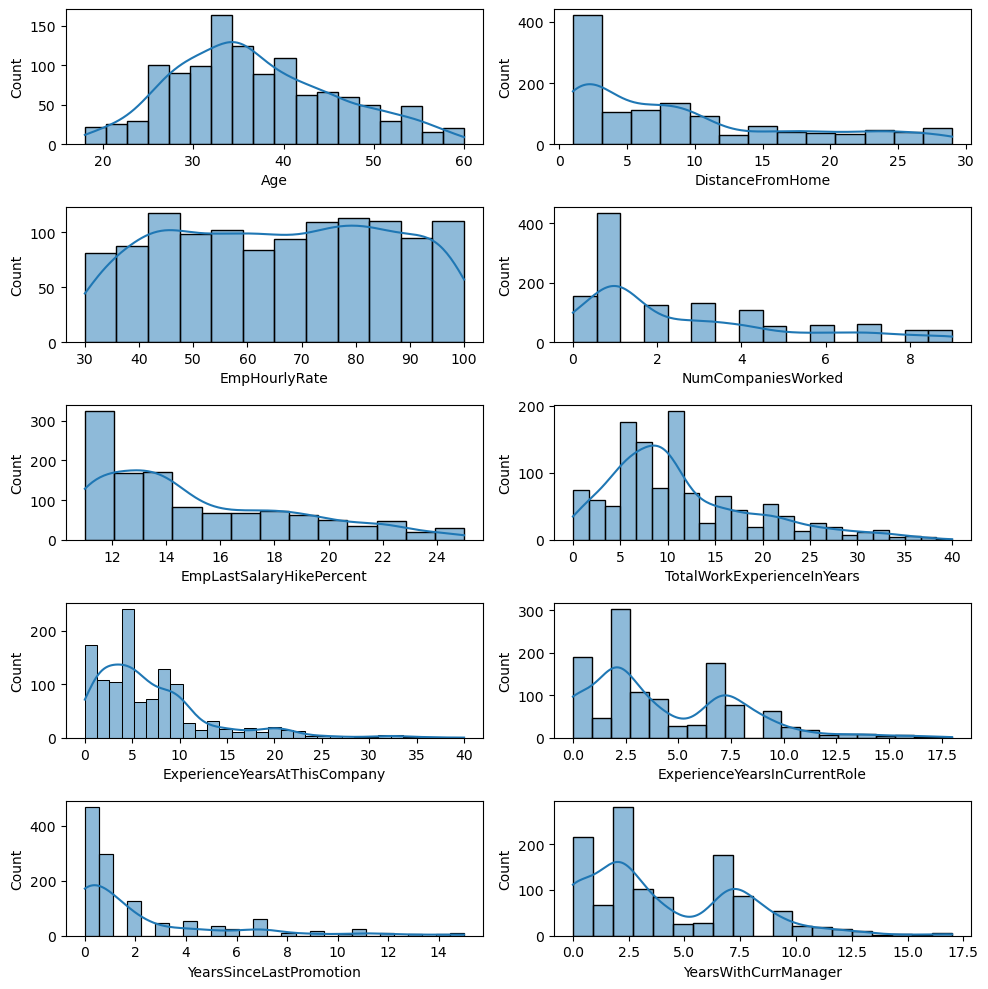

In [19]:
#applying hist plot for continous columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in continous_cols:
    plt.subplot(5,2,plotnumber)
    sns.histplot(x = df[i],kde = True)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

###### Insights : 

### 1. Age

 * The distribution is right-skewed, indicating a larger proportion of employees are younger.
 * The majority of employees are between 25 and 40 years old.
 * There are a few outliers on the higher end, suggesting some older employees in the dataset.


### 2. Distance From Home

 * The distribution is right-skewed, with most employees living closer to their workplace.
 * A significant number of employees live within 10 kilometers of their workplace.
 * There are a few employees who commute longer distances.


### 3. Employee Hourly Rate

 * The distribution is right-skewed, indicating a larger proportion of employees with lower hourly rates.
 * The majority of employees earn between $50 and $70 per hour.
 * There are a few outliers with higher hourly rates.


### 4. Number of Companies Worked

 * The distribution is right-skewed, with most employees having worked for fewer companies.
 * A significant number of employees have worked for 1-2 companies.
 * There are a few employees who have worked for more companies.


### 5. Employee Last Salary Hike Percent

 * The distribution is right-skewed, indicating a larger proportion of employees with lower salary hike percentages.
 * The majority of employees received a salary hike between 10% and 15%.
 * There are a few outliers with higher salary hike percentages.


### 6. Total Work Experience in Years

 * The distribution is right-skewed, indicating a larger proportion of employees with fewer years of experience.
 * The majority of employees have between 10 and 20 years of experience.
 * There are a few employees with more than 30 years of experience.


### 7. Experience Years At this Company

 * The distribution is right-skewed, indicating a larger proportion of employees with fewer years of experience at the current company.
 * The majority of employees have between 2 and 5 years of experience at the current company.
 * There are a few employees with more than 20 years of experience at the current company.


### 8. Experience Years in Current Role

 * The distribution is right-skewed, indicating a larger proportion of employees with fewer years of experience in their current role.
 * The majority of employees have between 2 and 5 years of experience in their current role.
 * There are a few employees with more than 10 years of experience in their current role.


### 9. Years Since Last Promotion

 * The distribution is right-skewed, indicating a larger proportion of employees who have been promoted recently.
 * The majority of employees have been promoted within the last 2 years.
 * There are a few employees who haven't been promoted for more than 10 years.


### 10. Years with CurrManager

 * The distribution is right-skewed, indicating a larger proportion of employees who have worked with their current manager for fewer years.
 * The majority of employees have worked with their current manager for between 2 and 5 years.
 * There are a few employees who have worked with their current manager for more than 10 years.


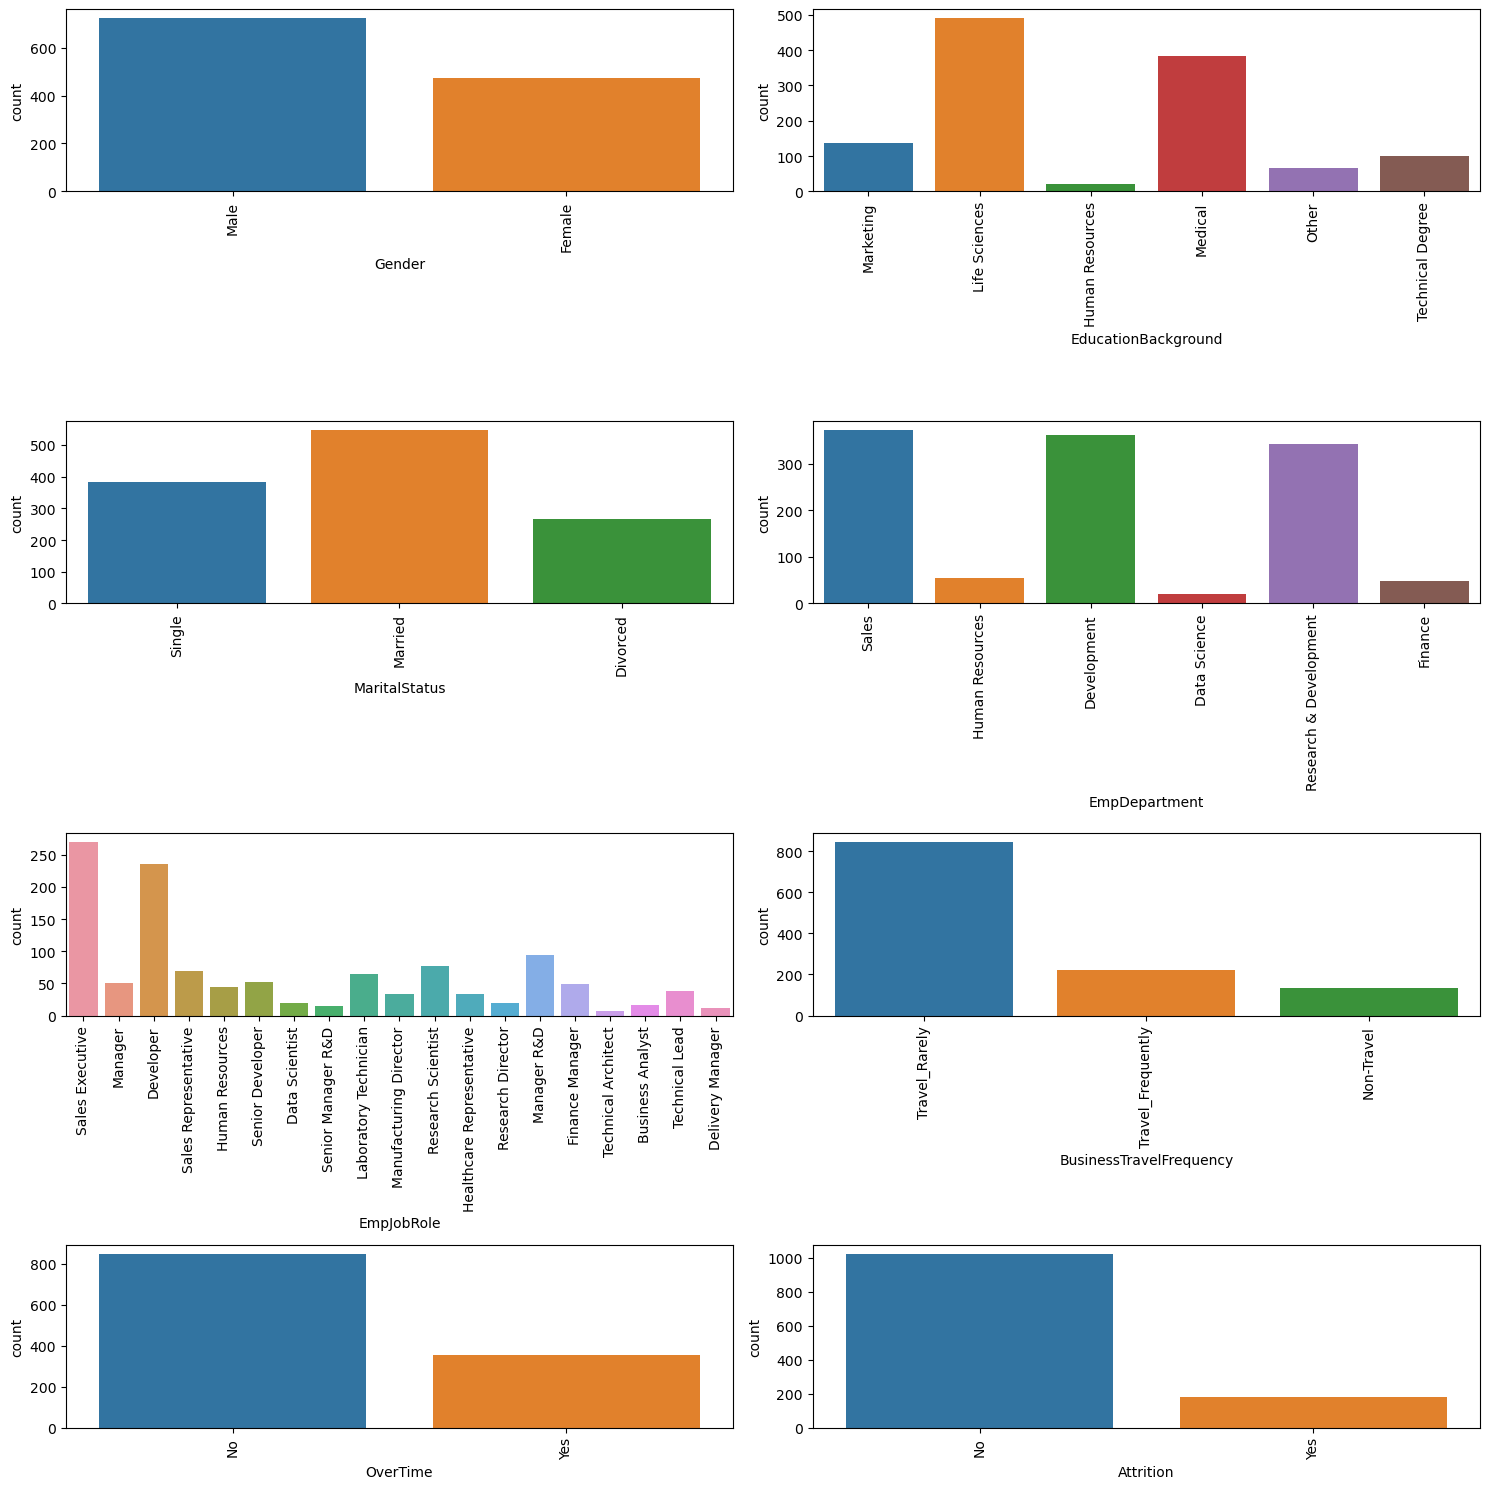

In [20]:
#applying count plot for categorical columns
plt.figure(figsize=(15,15))
plotnumber = 1
for i in cat_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(x = df[i])
    plt.xticks(rotation = 90)
    plotnumber = plotnumber + 1
plt.tight_layout()

###### Insights : 

### 11. Gender

 * The dataset appears to be dominated by male employees.


### 12. Education Background

* There are a few distinct groups of employees based on their education background, with some groups being more prevalent than others.


### 13. Marital Status

 * The majority of employees are married.


### 14. Employee Department

- Most of the employees are from sales department as well as Development and research & Development departmnet.
- Human resources & finance department employee is almost equal.
- Data science employee has minimum in company.

### 15. Employee Job Role

- Sales Executive and Developers are the most common job roles, comprising a significant portion of the workforce.
- Manager R&D and Research Scientists representing about 5% and 4% of the workforce , respectively.
- Other job roles making up less than 2-4% of the total workforce

### 16. Business Travel Frequency

- About 65% of employees travel rarely for business
- 17% travel frequently
- 10% employees do not travel for business

### 17. OverTime

- 70% do not work overtime
- 30% employees work overtime

### 18. Attrition

- 85% employees have not left the company
- 15% have left the company

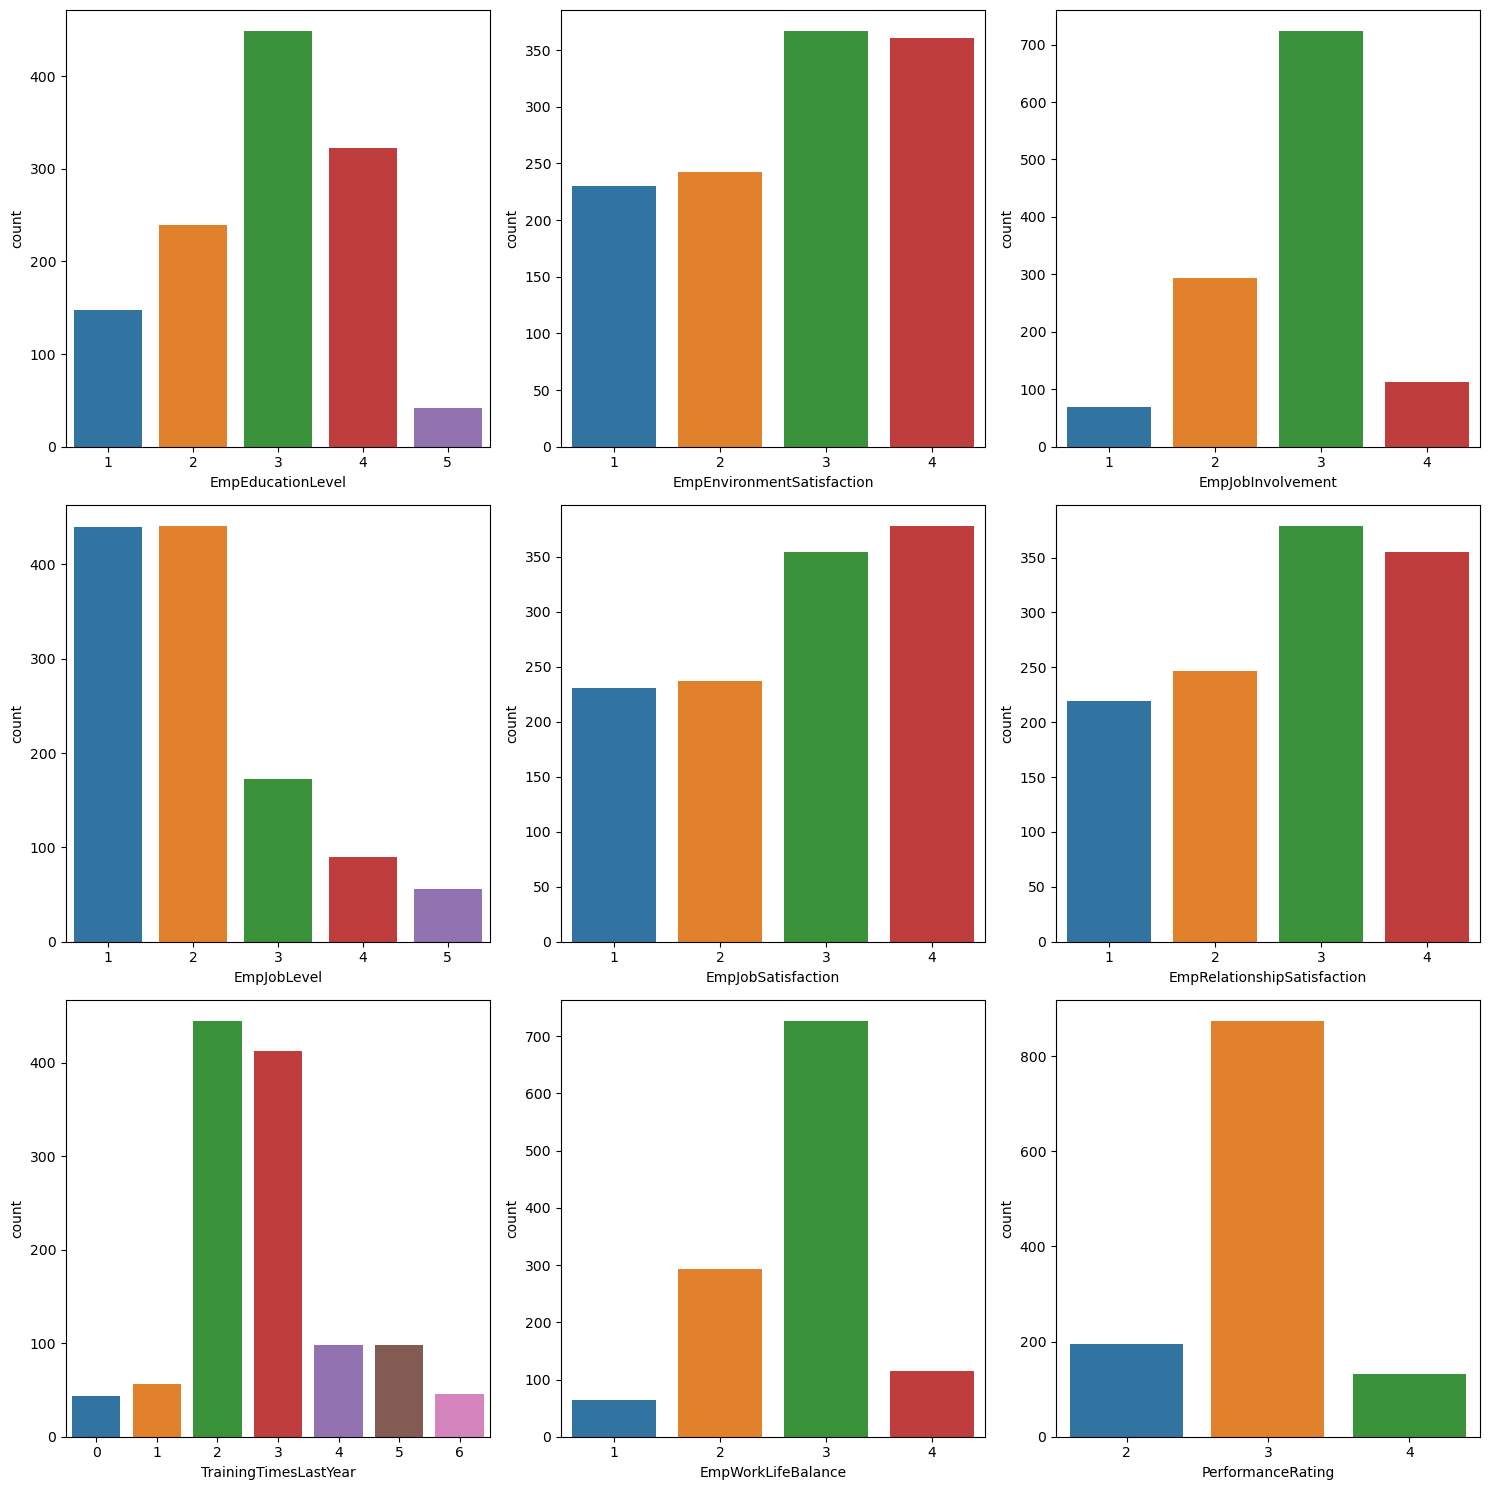

In [21]:
#applying countplot for discrete columns
plt.figure(figsize=(15,15))
plotnumber = 1
for i in discrete_cols:
    plt.subplot(3,3,plotnumber)
    sns.countplot(x = df[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

###### Insights : 

### 19. Employee Education Level

- The majority of employees have a Bachelors Degree
- There is a significant drop off in the number of employees with higher education levels

### 20. Employee Environment Satisfaction

- The distribution is relatively even across the satisfaction levels.
- Most employees seem to be moderately satisfied with their education

### 21. Employee Job Involvement

- Most employees have a high level of job involvement

### 22. Employee Job Level

- The distribution is right skewed, with a larger proportion of employees at lower job levels.
- There are fewer employees at higher job levels.

### 23. Employee Job  & Relationship Satisfaction

- The dsitribution is relatively even across the satisfaction levels.
- Most employees seem to be modeerately satisfied with thier job.

### 25. Training Times Last Year

 * The distribution is right-skewed, indicating that most employees attended a smaller number of training sessions.
 * A significant portion of employees attended 0 or 1 training session in the last year.
 * There are fewer employees who attended a higher number of training sessions.


### 26. Employee Work Life Balance

 * The distribution is right-skewed, indicating that most employees perceive a lower level of work-life balance.
 * A significant portion of employees rated their work-life balance as 1 or 2.
 * There are fewer employees who rated their work-life balance as 3 or 4.


### 27. Performance Rating

 * A significant portion of employees received a rating of 3.
 * There are fewer employees who received a higher performance rating


#  2. Bivariate Analysis

In [22]:
custom_palette =["#0000FF","#FF0000","#00FF00"]

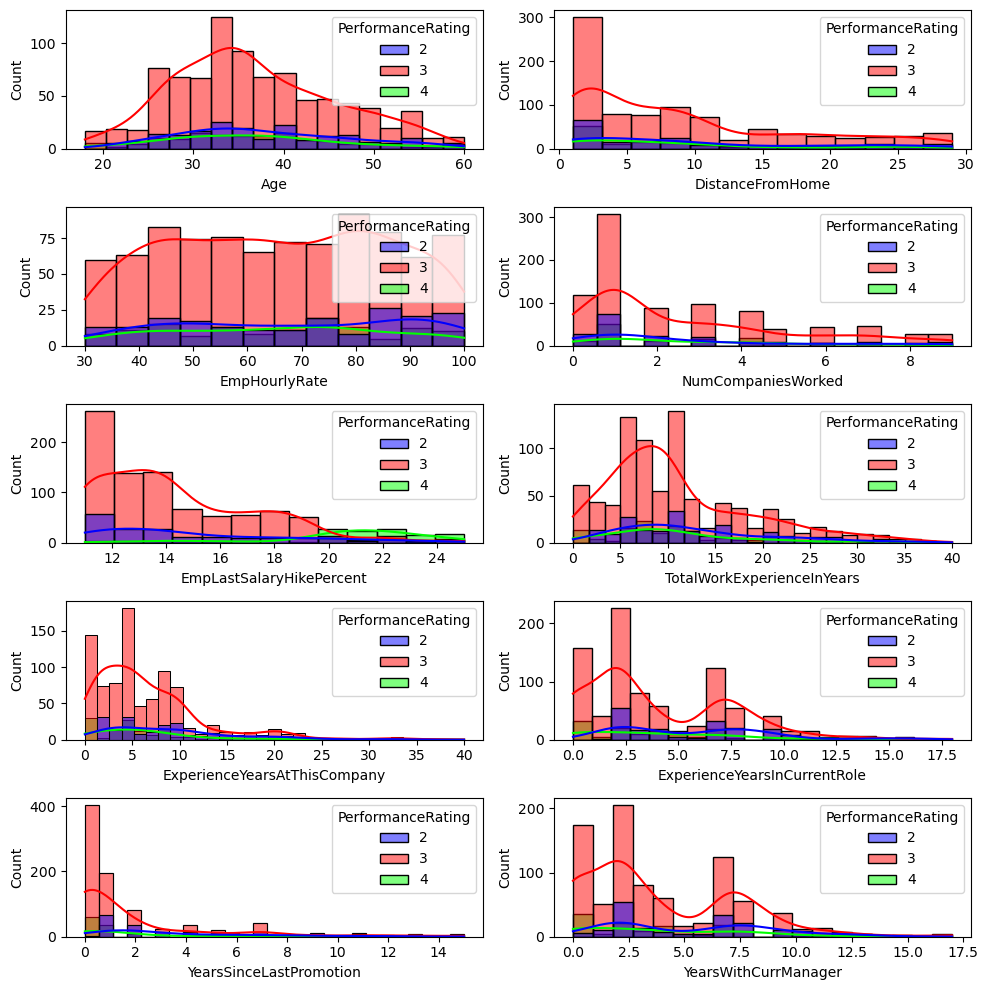

In [23]:
# continous columns vs target variable

plt.figure(figsize=(10,10))
plotnumber = 1
for i in continous_cols:
    plt.subplot(5,2,plotnumber)
    sns.histplot(data = df, x = i,hue = 'PerformanceRating',kde = True, palette = custom_palette)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

###### Insights : 

- **Age vs. PerformanceRating** : There seems to be a slight increase in performance rating with age, but the relationship is not very strong.   
- **DistanceFromHome vs. PerformanceRating** : There is no clear relationship between distance from home and performance rating.    
- **EmpHourlyRate vs. PerformanceRating** : Higher hourly rates appear to be associated with higher performance ratings.   
- **NumCompaniesWorked vs. PerformanceRating** : There is no clear relationship between the number of companies worked and performance rating.   
- **TotalWorkExperienceYears vs. PerformanceRating** : There is a slight increase in performance rating with more years of experience, but the relationship is not very strong.   
- **EmpLastSalaryHikePercent vs. PerformanceRating** : Higher salary hikes seem to be associated with higher performance ratings.   
- **ExperienceYearsAtThisCompany vs. PerformanceRating** : There is a slight increase in performance rating with more years of experience at the current company.   
- **ExperienceYearsInCurrentRole vs. PerformanceRating** : There is a slight increase in performance rating with more years of experience in the current role.    
- **YearsSinceLastPromotion vs. PerformanceRating** : There is a slight decrease in performance rating with more years since the last promotion.    
- **YearsWithCurrManager vs. PerformanceRating** : There is no clear relationship between the number of years with the current manager and performance rating.   



## Relation between Age and ExperienceinYeras

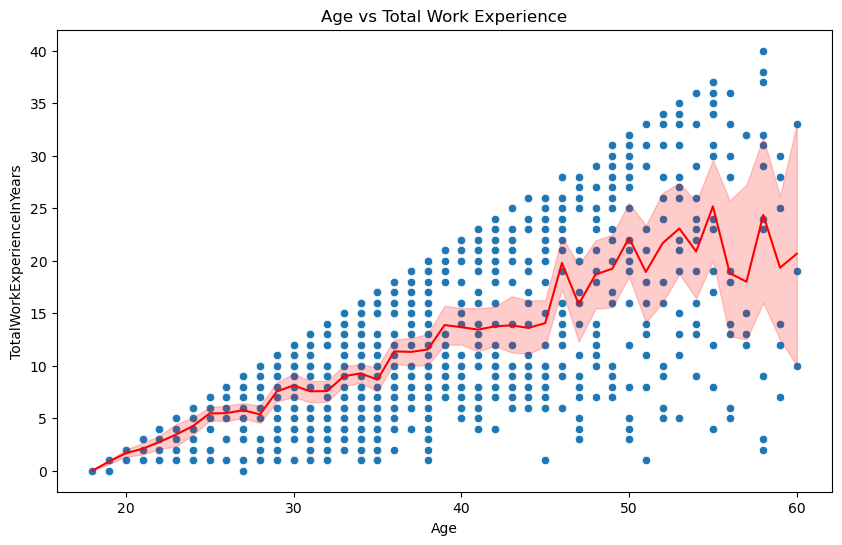

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='TotalWorkExperienceInYears',data=df)
sns.lineplot(x=df.Age,y=df.TotalWorkExperienceInYears, color ='red')
plt.title('Age vs Total Work Experience', fontsize = 12)
plt.show()


###### Insights :

- It is positively correlated, As age increases, total work experience also tends to increase. This is expected, as older individuals have had more time to acculate work experience.

## Relation between TotalWorkExperience and ExperienceYears at this company

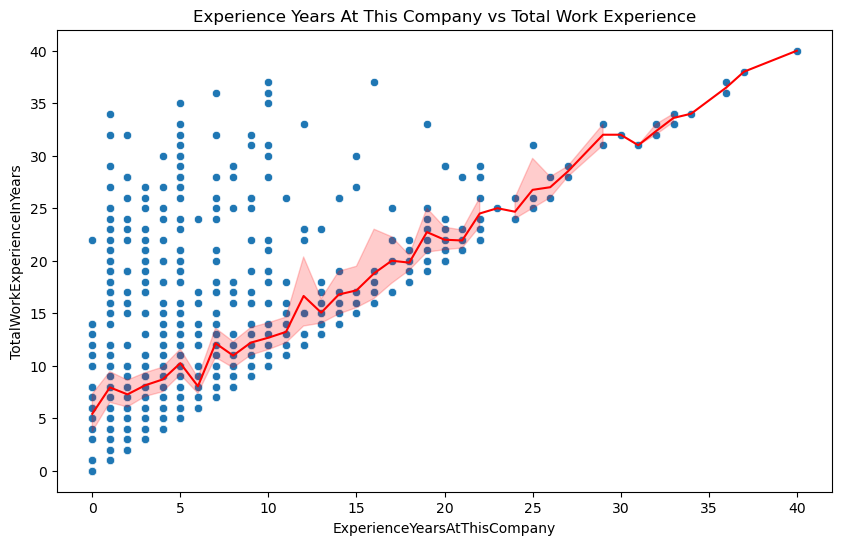

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=df)
sns.lineplot(x=df.ExperienceYearsAtThisCompany,y=df.TotalWorkExperienceInYears, color ='red')
plt.title('Experience Years At This Company vs Total Work Experience', fontsize = 12)
plt.show()


###### Insights :

- It is also showing positive correlation

## Relation between EmplLastSalaryHikePercent and NumCompaniesWorked

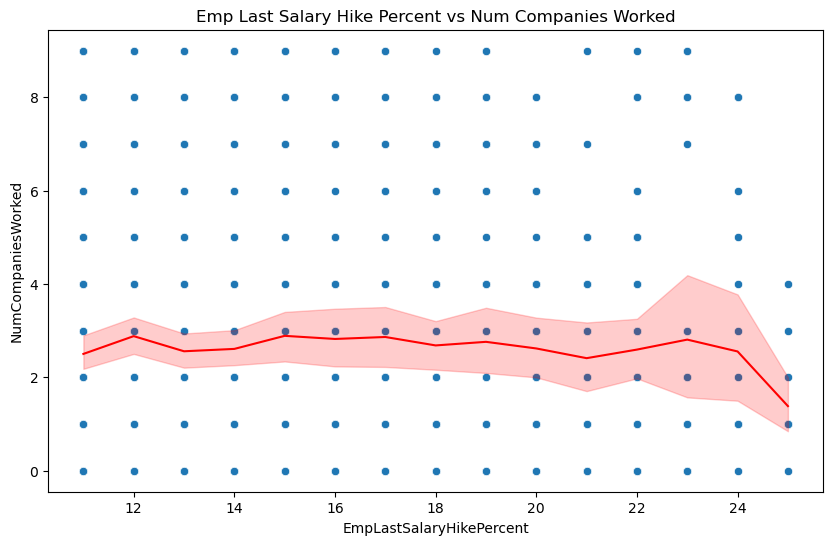

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=df)
sns.lineplot(x=df.EmpLastSalaryHikePercent,y=df.NumCompaniesWorked, color ='red')
plt.title('Emp Last Salary Hike Percent vs Num Companies Worked', fontsize = 12)
plt.show()


###### Insights:

- This appears to be a weak positive correlation between the last salary hike percentage and the number of companies worked. This suggests that employees who have worked for more companies might end to receive slightly higher salary hikes

## Relation between Years with currmanager vs experinece years at this company

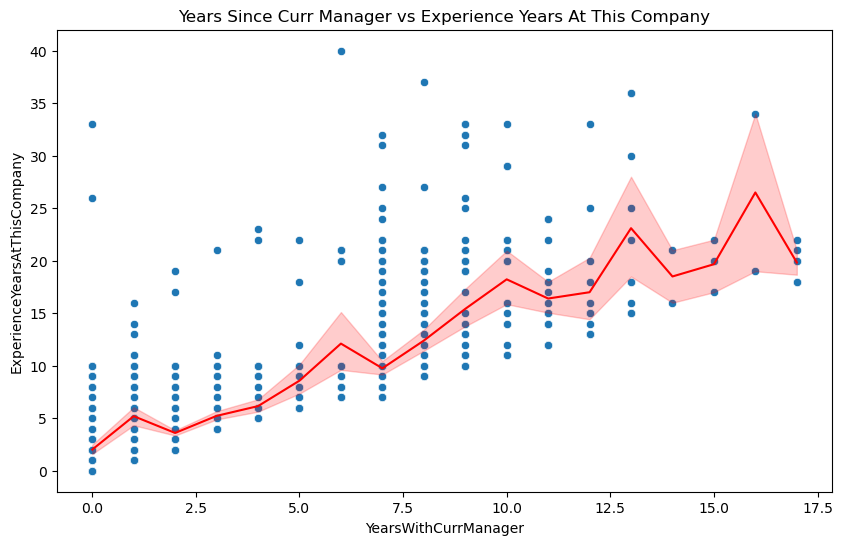

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsWithCurrManager',y='ExperienceYearsAtThisCompany',data=df)
sns.lineplot(x=df.YearsWithCurrManager,y=df.ExperienceYearsAtThisCompany, color ='red')
plt.title('Years Since Curr Manager vs Experience Years At This Company', fontsize = 12)
plt.show()


###### Insights

- As the number of years since the current manager increases, the number of years of experience at the company also tends to increase. This Suggests that employee who have been with the same manager for longer tend to have a longer tenure with the company 

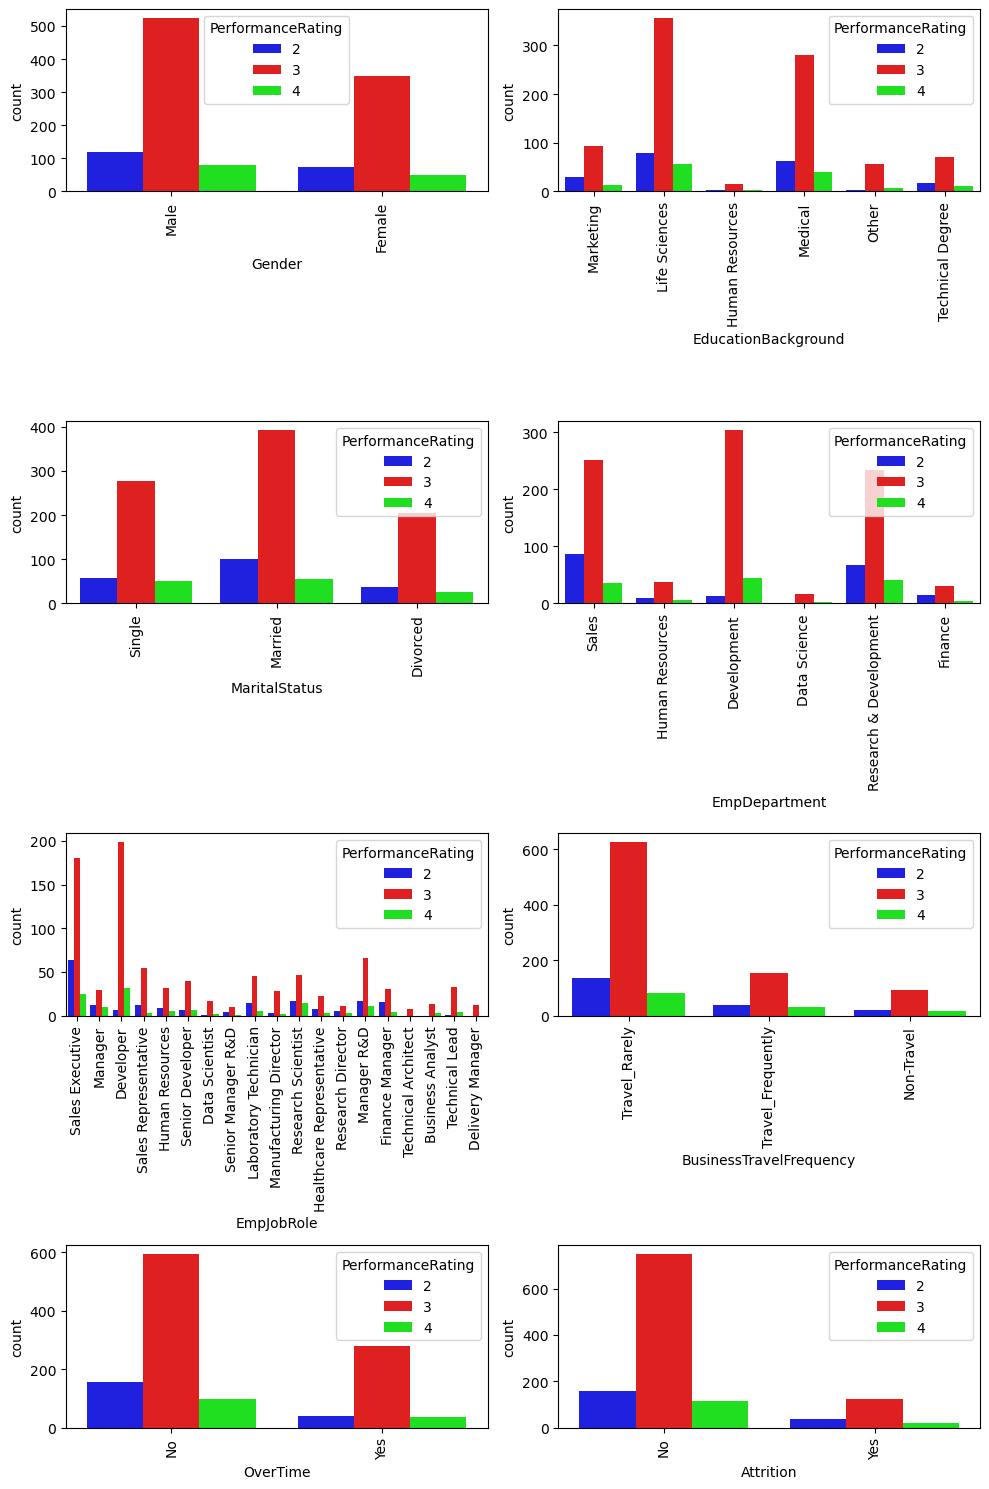

In [28]:
#categorical columns vs target variable
plt.figure(figsize=(10,15))
plotnumber = 1
for i in cat_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(data  = df,x = i, hue = 'PerformanceRating', palette = custom_palette)
    plt.xticks(rotation = 90)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

###### Insights : 

- **Gender vs. PerformanceRating** : There seems to be a slight tendency for female employees to have higher performance ratings compared to male employees.   
- **Education Background vs. PerformanceRating** : Employees with a background in Life Sciences tend to have higher performance ratings. However, the differences between other education backgrounds are not significant.    
- **Marital Status vs. PerformanceRating** : Married employees tend to have higher performance ratings compared to single or divorced employees.   
- **EmpDepartment vs. PerformanceRating** : Employees in the 'Sales' and 'Research & Development' departments tend to have higher performance ratings.    
- **EmpJobRole vs. PerformanceRating** : Several job roles, such as Sales Executive, Senior Developer, Data Scientist, and Research Scientist, tend to have higher performance ratings. This suggests that these roles might have higher performance expectations or require specific skills that lead to better performance.   
- **BusinessTravelFrequency vs. PerformanceRating** : Employees who travel frequently seem to have slightly higher performance ratings compared to those who travel rarely or not at all. This could be due to increased exposure to different situations, opportunities for learning and growth, or higher levels of responsibility.    
- **OverTime vs. PerformanceRating** : There is no clear relationship between working overtime and performance rating. Employees who work overtime and those who don't seem to have similar performance distributions.   
- **Attrition vs. PerformanceRating** : Employees who have not left the company (Attrition = No) tend to have higher performance ratings compared to those who have left (Attrition = Yes). This suggests that higher performance might be a factor in employee retention.



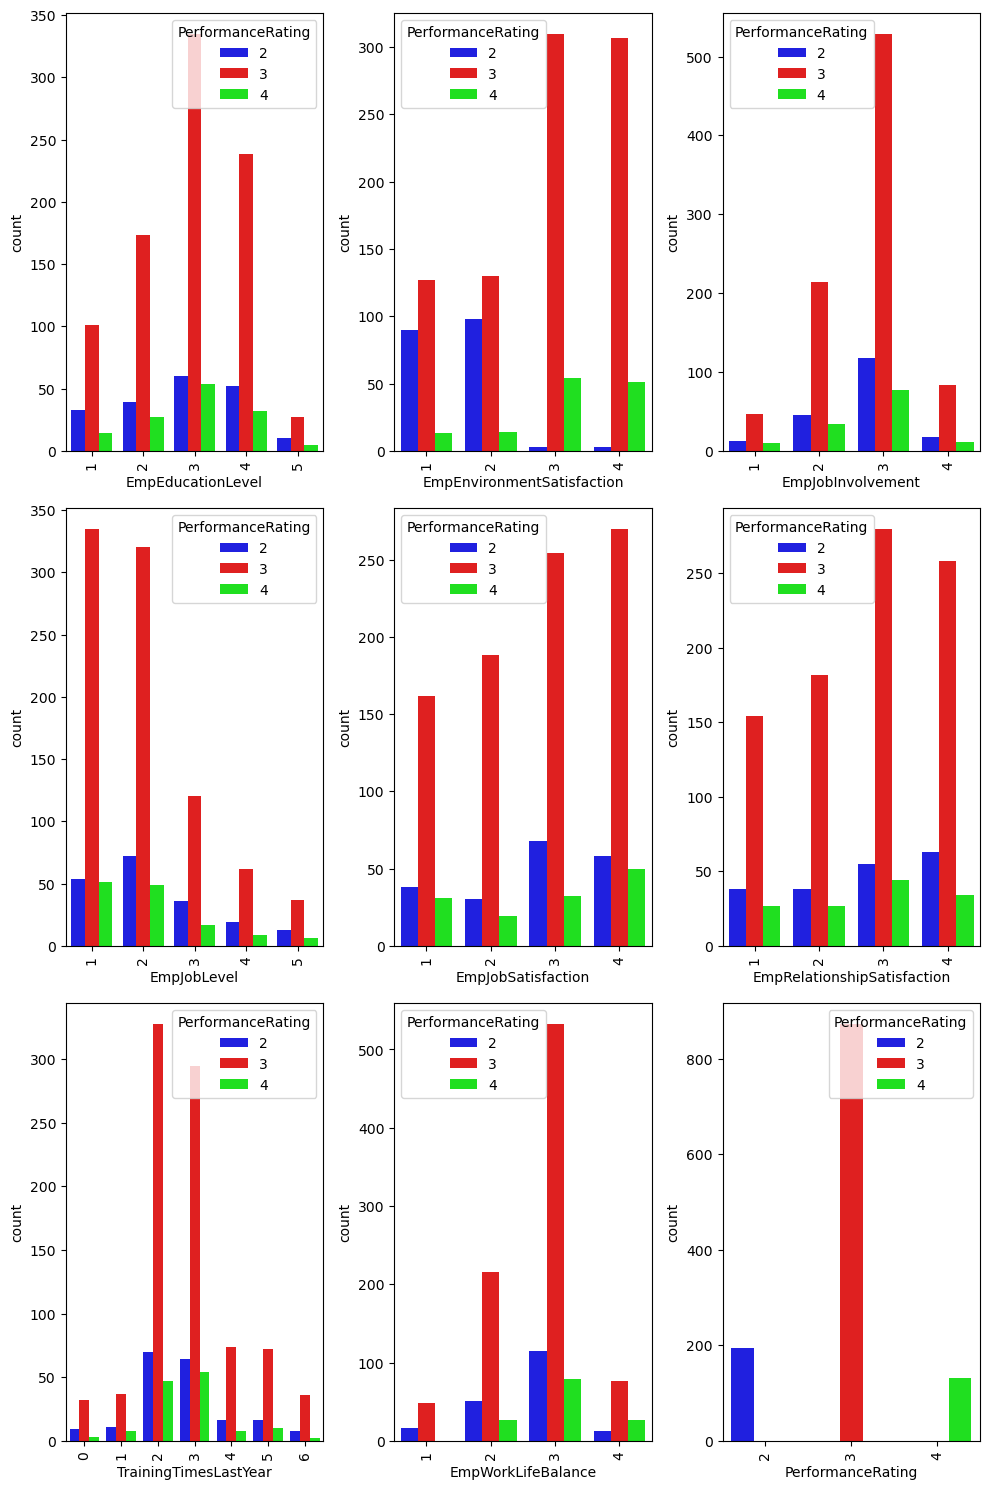

In [29]:
#discrete variable vs target variable
plt.figure(figsize=(10,15))
plotnumber = 1
for i in discrete_cols:
    plt.subplot(3,3,plotnumber)
    sns.countplot(data  = df,x = i, hue = 'PerformanceRating', palette =custom_palette)
    plt.xticks(rotation = 90)
    plotnumber = plotnumber + 1
plt.tight_layout()

###### Insights : 

- **EmpEducationLevel vs. PerformanceRating** : Employees with higher education levels (Master's and PhD) tend to have higher performance ratings. This suggests that higher education can contribute to better job performance.   
- **EmpEnvironmentSatisfaction vs. PerformanceRating** : Employees with higher job satisfaction tend to have higher performance ratings. This highlights the importance of creating a positive work environment to boost employee morale and productivity.   
- **EmpJobInvolvement vs. PerformanceRating** : Employees with higher job involvement tend to have higher performance ratings. This suggests that engaging employees and fostering a sense of ownership can lead to better performance.   
- **EmpJobLevel vs. PerformanceRating** : Employees at higher job levels tend to have higher performance ratings. This could be due to increased responsibility, higher expectations, or better compensation packages.   
- **EmpJobSatisfaction vs. PerformanceRating** : Employees with higher job satisfaction tend to have higher performance ratings. This reinforces the importance of creating a positive work environment and providing opportunities for growth and development.    
- **EmpRelationshipSatisfaction vs. PerformanceRating** : Employees with higher relationship satisfaction tend to have higher performance ratings. This suggests that positive relationships with colleagues and supervisors can contribute to better job performance.    
- **TrainingTimesLastYear vs. PerformanceRating** : Employees who attended more training sessions tend to have higher performance ratings. This suggests that training and development opportunities can positively impact employee performance.   
- **EmpWorkLifeBalance vs. PerformanceRating** : Employees with a higher work-life balance tend to have higher performance ratings. This highlights the importance of work-life balance in maintaining employee morale and productivity.    



# Multivariate Analysis

## 1. Managerial and Work Environment Factors

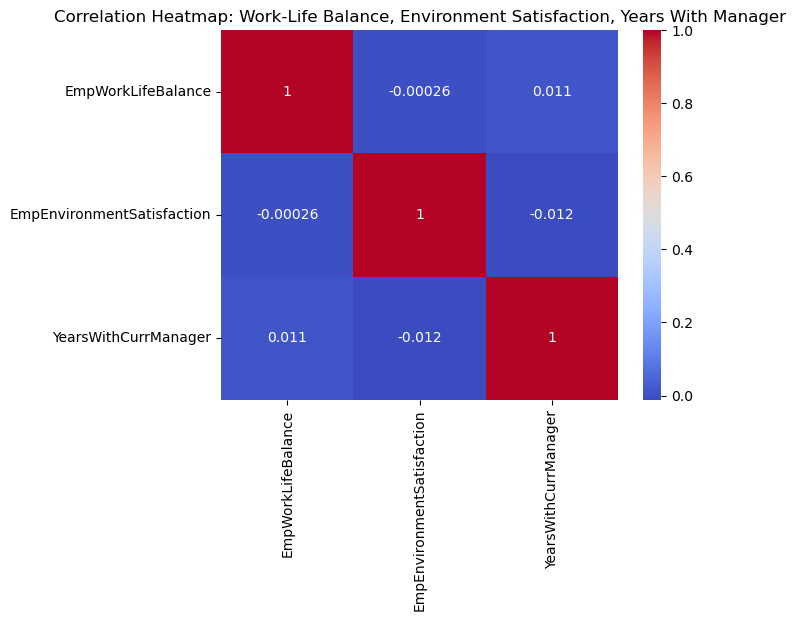

In [33]:
sns.heatmap(df[['EmpWorkLifeBalance', 'EmpEnvironmentSatisfaction', 'YearsWithCurrManager']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Work-Life Balance, Environment Satisfaction, Years With Manager")
plt.show()

###### Insights : 

- The heatmap suggests that these three factors are largely independent of each other

## 2. Attrition and Performance

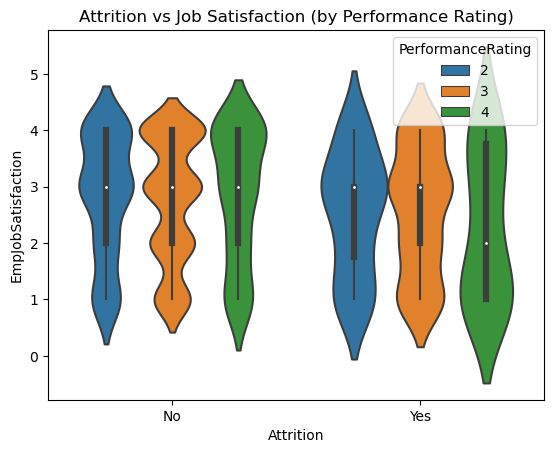

In [42]:
sns.violinplot(data=df, x='Attrition', y='EmpJobSatisfaction', hue='PerformanceRating')
plt.title("Attrition vs Job Satisfaction (by Performance Rating)")
plt.show()

###### Insights:

- Employees with lower job satisfaction are more likely to leave the company.
- Higher-Performing employees tend to have higher job satisfaction and are less likely to leave,

## 3. Distance and Travel-Related Variables

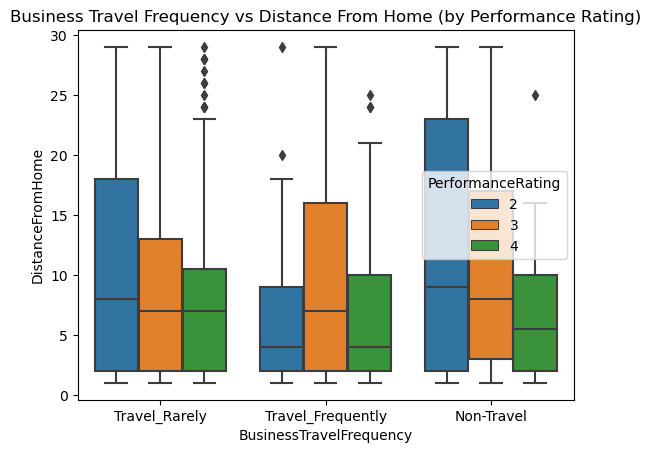

In [37]:
sns.boxplot(data=df, x='BusinessTravelFrequency', y='DistanceFromHome', hue='PerformanceRating')
plt.title("Business Travel Frequency vs Distance From Home (by Performance Rating)")
plt.show()

###### Insights:

- This indicates that distance and travelling might not be a significant factor in performance

## 4. Employee Enagagement and Work Balance

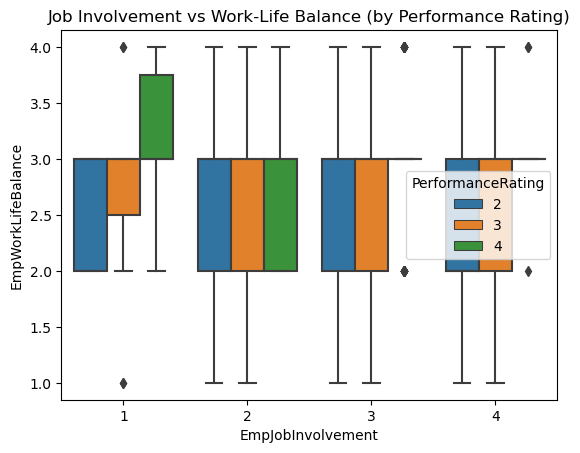

In [38]:
sns.boxplot(data=df, x='EmpJobInvolvement', y='EmpWorkLifeBalance', hue='PerformanceRating')
plt.title("Job Involvement vs Work-Life Balance (by Performance Rating)")
plt.show()

###### Insights

- Higher performing employees tend to have both higher job involvement and better work life balance

## 5. Salary, Promotion and Satisfaction

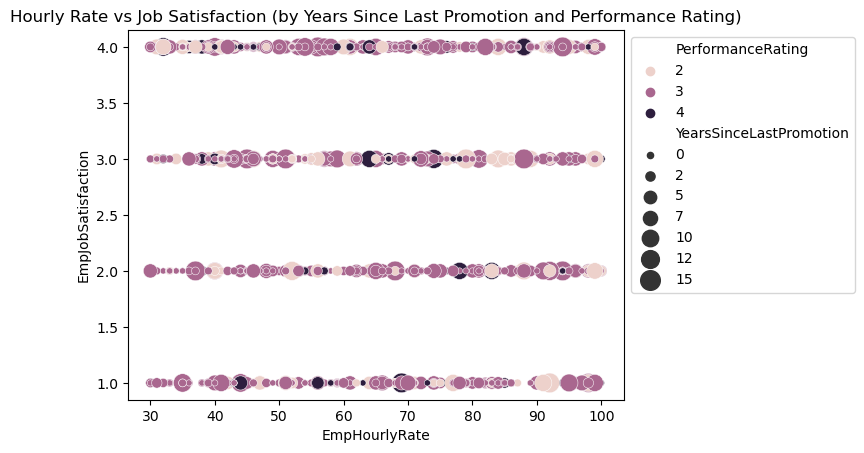

In [39]:
sns.scatterplot(data=df, x='EmpHourlyRate', y='EmpJobSatisfaction', size='YearsSinceLastPromotion', hue='PerformanceRating', sizes=(20, 200))
plt.title("Hourly Rate vs Job Satisfaction (by Years Since Last Promotion and Performance Rating)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

###### Insights:

- Higher performing employees tend to have higher job satisfaction, regardless of their hourly rate or years since last promotion.

# Final Insights :